<a href="https://colab.research.google.com/github/vitaoTM/python_projects/blob/master/Projeto_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando ferramentas para o projeto

In [2]:
import pandas as pd
!pip install seaborn==0.9.0


     |████████████████████████████████| 208 kB 26.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [3]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importando Base de Dados

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/tips.csv', sep=',')
dados.sample(5)

,total_bill,tip,dessert,day,time,size
34,17.78,3.27,No,Sat,Dinner,2
173,31.85,3.18,Yes,Sun,Dinner,2
155,29.85,5.14,No,Sun,Dinner,5
219,30.14,3.09,Yes,Sat,Dinner,4
1,10.34,1.66,No,Sun,Dinner,3


### Traducao

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
# renomeando culunas para portugues
renomear = {'total_bill' : 'valor_da_conta', 
            'tip': 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time' : 'horario', 
            'size' : 'numero_de_pessoas'}

In [7]:
gorjetas = dados.rename(columns= renomear)
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


In [8]:
# Verificando quantos objetos diferentes existem dentro da coluna 
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
# Renomeando dias da semana 
renomear_semana = {'Sun' : 'Domingo',
                   'Sat' : 'Sabado',
                   'Fri' : 'Sexta',
                   'Thur': 'Quinta'}

In [10]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(renomear_semana)
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
0,16.99,1.01,No,Domingo,Dinner,2
1,10.34,1.66,No,Domingo,Dinner,3


In [11]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Renomeando sim nao da coluna sobremesa
sim_nao = {'Yes' : 'Sim',
           'No' : 'Não'}
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [13]:
gorjetas['horario'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
# Renomendo coluna de horario
horario = {'Dinner' : 'Jantar', 
           'Lunch' : 'Almoco'}

gorjetas['horario'] = gorjetas['horario'].map(horario)

In [15]:
gorjetas.sample(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
60,20.29,3.21,Sim,Sabado,Jantar,2
2,21.01,3.50,Não,Domingo,Jantar,3
55,19.49,3.51,Não,Domingo,Jantar,2


### Exercicios de aula 
* traduzir o nome das colunas
* traduzir os nomes dos paises 


In [16]:
population = (
{
'Country': ['Belgium', 'India', 'Japan'],
'Population': [12345, 67891011, 98765]
})
dados_1 = pd.DataFrame(population)

In [17]:
paises = {'Belgium' : 'Bélgica', 
          'India' : 'Índia', 
          'Japan' : 'Japão'}
traducao_colunas = {'Population':'População',
                    'Country': 'País'}

In [19]:
dados_1 = dados_1.rename(columns= traducao_colunas)
dados_1['País'] = dados_1['País'].map(paises)
dados_1

,País,População
0,Bélgica,12345
1,Índia,67891011
2,Japão,98765


### Exercico 2
* adicionar media na tabela de notas dos alunos 
* Ultilizar apenas 2 casas decimais

In [ ]:
boletim = ({
    'Aluno' : ['Márcia', 'Lucas', 'Ana', 'Flávio'],
    'Nota_1' : [10, 8, 5, 4],
    'Nota_2' : [7, 4, 8, 5],
    'Nota_3' : [6, 7, 4, 9]
})

In [ ]:
dados_2 = pd.DataFrame(boletim)
dados_2

In [ ]:
dados_2['Média'] = ((dados_2.Nota_1 + dados_2.Nota_2 + dados_2.Nota_3) / 3).round(2)
dados_2

# Análise 1 - Valor da conta e Gorjeta

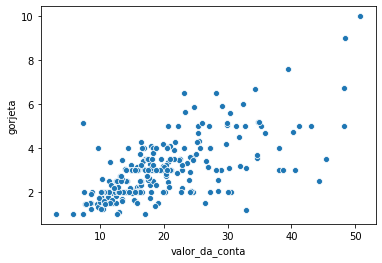

In [20]:
figura_grafico_dispersao = sns.scatterplot(x=gorjetas['valor_da_conta'], y=gorjetas['gorjeta'], data=gorjetas)

**Visualmente o valor da gorjeta almenta com o valor da conta**

In [21]:
print(f'A base de dados possui {gorjetas.shape[0]} registros')
gorjetas.count()

A base de dados possui 244 registros


valor_da_conta       244
gorjeta              244
sobremesa            244
dia_da_semana        244
horario              244
numero_de_pessoas    244
dtype: int64

## Criando campo %

In [22]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3


In [23]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


## Plotando graficos 

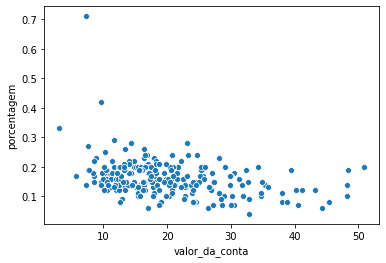

In [24]:
fig_porcentagem = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor das gorjetas não almentam junto com o valor da conta**

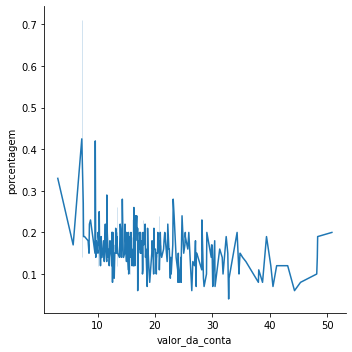

In [25]:
fig_porcentagem_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

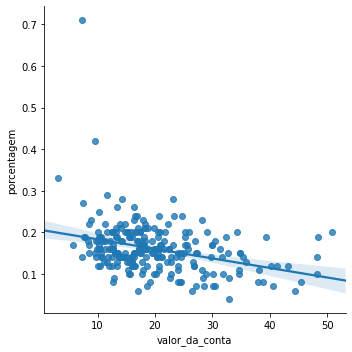

In [26]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Salvando os graficos plotados em uma figura baixavel

In [27]:
fig_porcentagem.set_title('Analise do valor da gorjeta em relacao ao valor da conta')
imagem_1 = fig_porcentagem.get_figure()

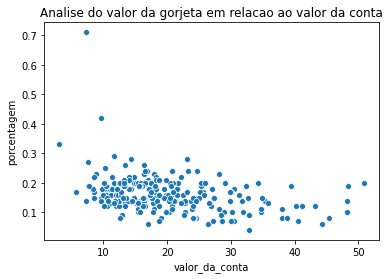

In [28]:
imagem_1

In [ ]:
imagem_1.savefig('grafico_dispercao_porcentagem.png')

# Analise 2 sobremesa

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


- Analise das gorjetas:
 * verificando se pessoas que pediram sobremesa ou nao esta relacionado com o valor de gorjeta dado.

In [31]:
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,numero_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [33]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,numero_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


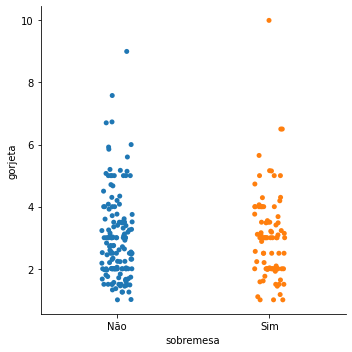

In [34]:
grafico_1 = sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

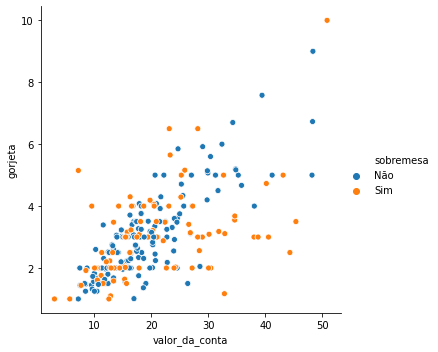

In [35]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data= gorjetas)

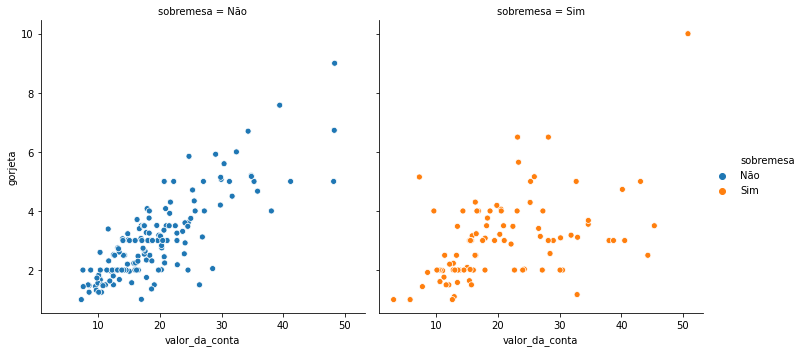

In [36]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data= gorjetas)

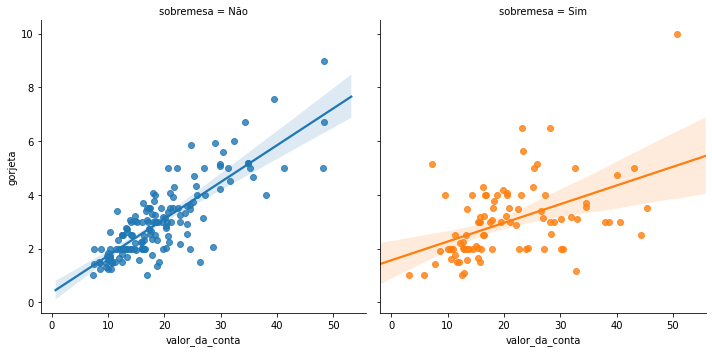

In [37]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

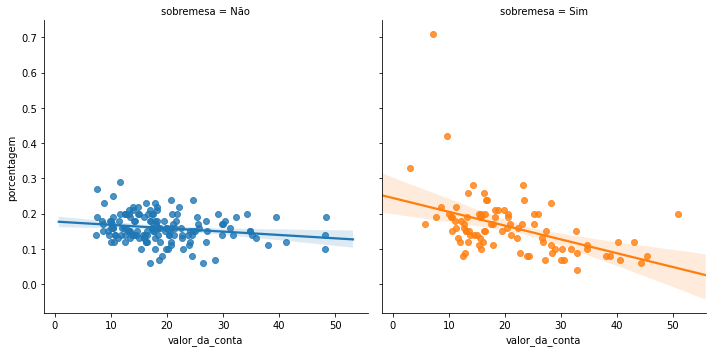

In [38]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não. <\n>  
Porem é necessário uma análise estatistica mais aprofundada para validar tal hipotese

## Teste de hipotese

**H<sup>null</sup>**
>**A distribuição0 da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição0 da gorjeta não é a mesma nos dois grupos**

In [39]:
from scipy.stats import ranksums


In [42]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não' ").porcentagem
sobremesa = gorjetas.query("sobremesa == 'Sim' ").porcentagem

In [45]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do pvalue é {r.pvalue.round(2)}')

O valor do pvalue é 0.53


Como o valor de significancia é maior que 0.05, se desconsidera a hipotese alternativa.

# Análise 3 - Dias da semanas influenciam na gorgeta?

In [46]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


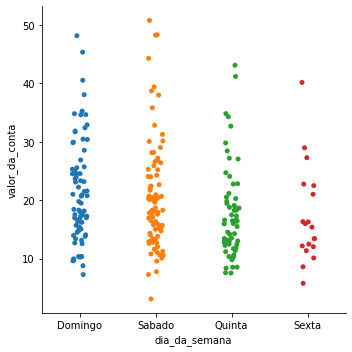

In [47]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

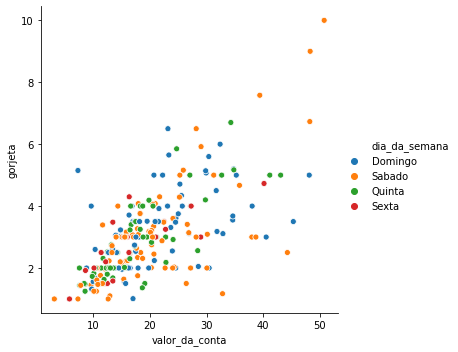

In [48]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

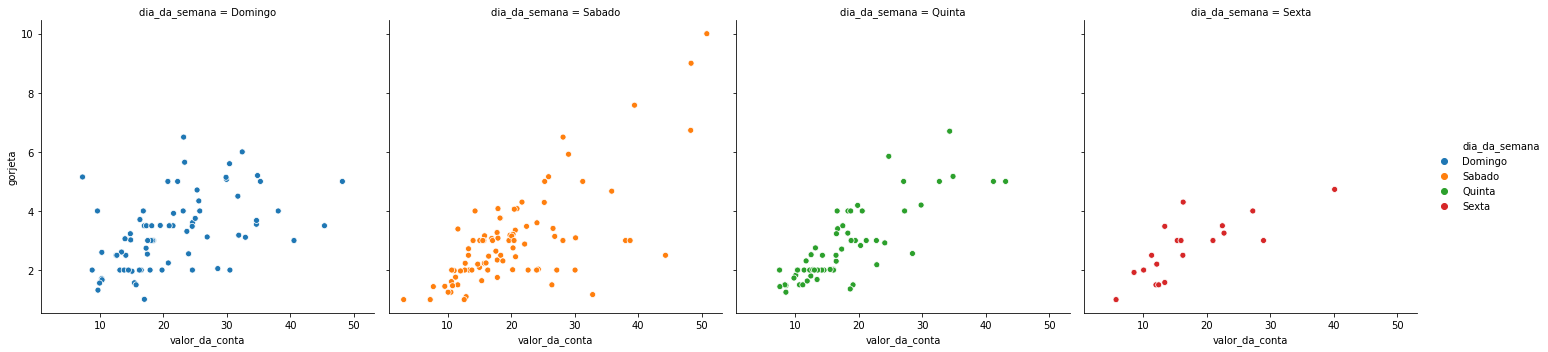

In [50]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

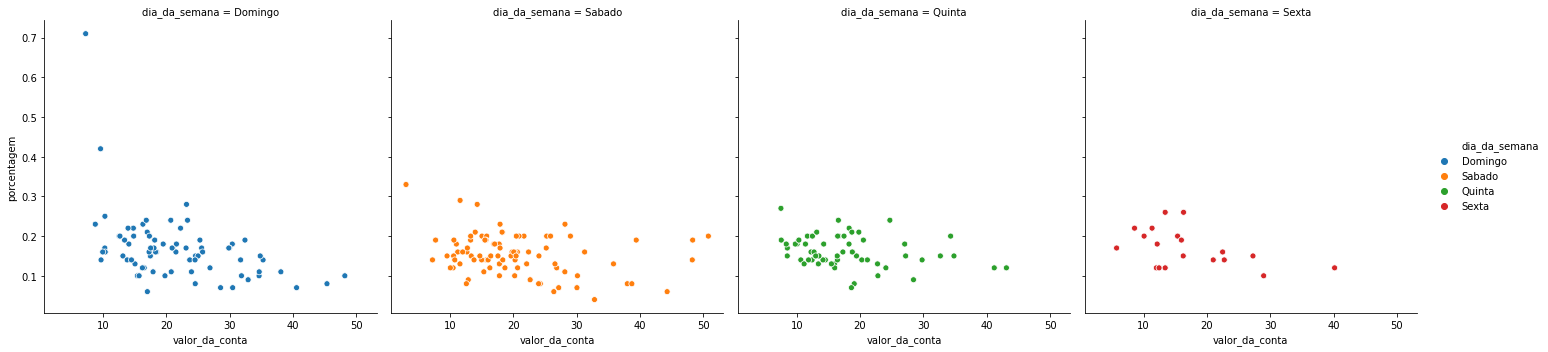

In [51]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

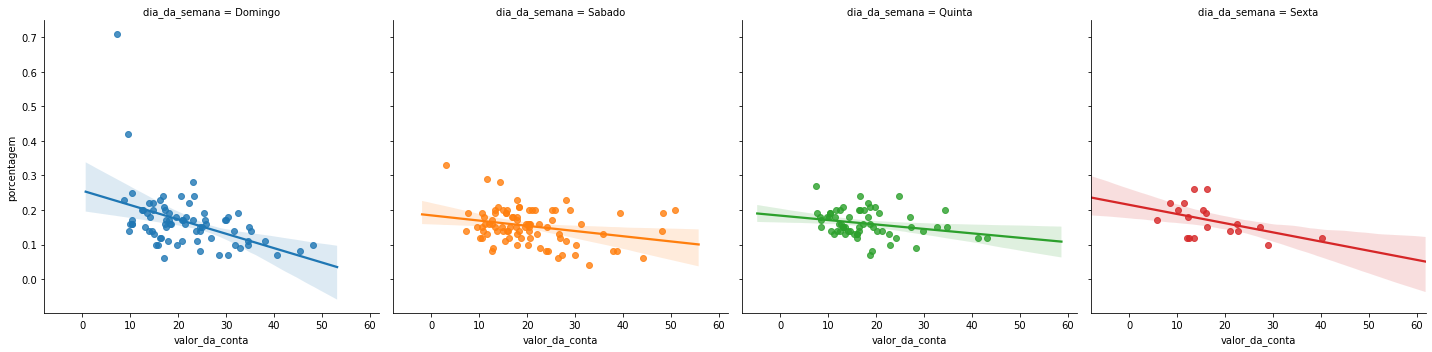

In [53]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana' ,col='dia_da_semana', data=gorjetas)

# Análise 4 - análise descritiva 

In [62]:
media_gorjetas = round(gorjetas['gorjeta'].mean(), 3)
print(f'A media geral das gorjetas é de {media_gorjetas}')

A media geral das gorjetas é de 2.998


In [68]:
round(gorjetas.groupby(['dia_da_semana']).mean(), 2)[['valor_da_conta','gorjeta','porcentagem']]
# gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sabado,20.44,2.99,0.15
Sexta,17.15,2.73,0.17


In [72]:
print('Frequenciade pessoas dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequenciade pessoas dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipotese


**H<sup>null</sup>**
>**A distribuição da conta é a mesma no Sabado e no domingo**

**H<sup>alt</sup>**
>**A distribuição da conta não é a mesma no Sabado e no domingo**

In [77]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [79]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**H<sup>null</sup>**
>**A distribuição da conta é a mesma no Sabado e no domingo**

In [81]:
print(f'O valor do p-value é de {r2.pvalue.round(2)}')

O valor do p-value é de 0.36


# Análise 4 - Horarios 

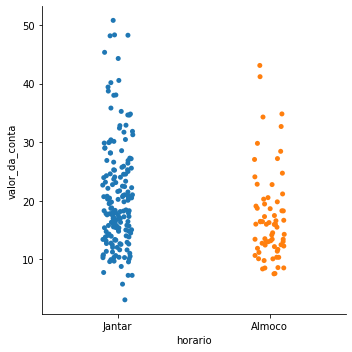

In [83]:
sns.catplot(x='horario', y='valor_da_conta', data=gorjetas)

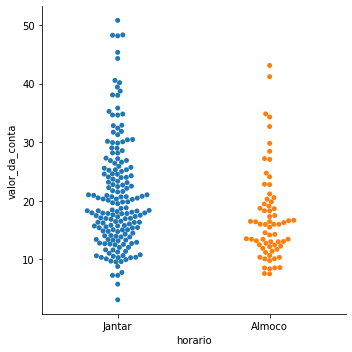

In [84]:
sns.catplot(x='horario', y='valor_da_conta', kind='swarm', data=gorjetas)

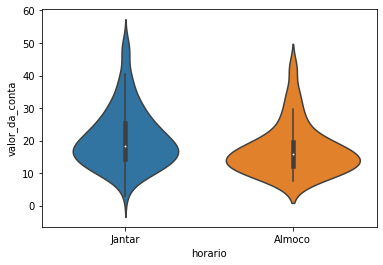

In [85]:
sns.violinplot(x='horario', y='valor_da_conta', data=gorjetas)

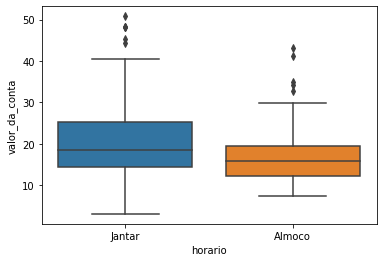

In [86]:
sns.boxplot(x='horario', y= 'valor_da_conta', data=gorjetas)

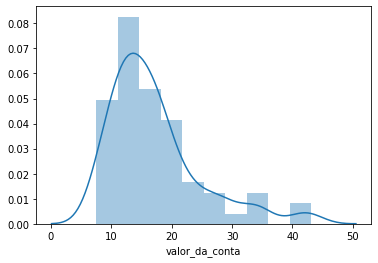

In [89]:
almoco = gorjetas.query("horario == 'Almoco'").valor_da_conta
sns.distplot(almoco)

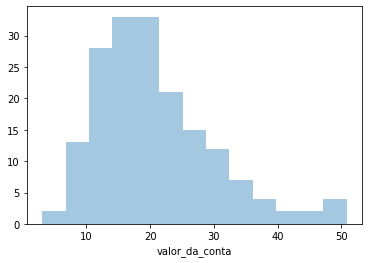

In [91]:
jantar = gorjetas.query("horario == 'Jantar'").valor_da_conta
sns.distplot(jantar, kde=False)